In [179]:
import math
math.sqrt(0.81)

0.9

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df_spot = pd.read_csv('assignment-analyst-1-spot-data.csv', parse_dates=['time'], index_col='time')

In [51]:
df_web = pd.read_csv('assignment-analyst-1-web-traffic-data.csv', parse_dates=['time'], index_col='time')

### Spot Data

In [52]:
df_spot.head()

,id,creative_id,spend,program,duration,network_code,is_dual_feed,rotation,rotation_days,rotation_start,rotation_end,feed
time,,,,,,,,,,,,
2017-10-16 12:25:32,411630,f3483f810d44cef79d90a66ab2da1bf0,69.7,RAISING HOPE,14.0,FXX,True,Weekday Day,"{1,2,3,4,5}",07:00:00,15:00:00,1.0
2017-10-16 15:25:32,411630,f3483f810d44cef79d90a66ab2da1bf0,15.3,RAISING HOPE,14.0,FXX,True,Weekday Day,"{1,2,3,4,5}",07:00:00,15:00:00,2.0
2017-10-16 12:56:36,411631,eff6a8d032a8ca3ae098381569a9c15f,69.7,RAISING HOPE,14.0,FXX,True,Weekday Day,"{1,2,3,4,5}",07:00:00,15:00:00,1.0
2017-10-16 15:56:36,411631,eff6a8d032a8ca3ae098381569a9c15f,15.3,RAISING HOPE,14.0,FXX,True,Weekday Day,"{1,2,3,4,5}",07:00:00,15:00:00,2.0
2017-10-16 14:38:41,411651,5992d996de2f11faa3492960a58de350,69.7,PARKS AND RECREATION,14.0,FXX,True,Weekday Day,"{1,2,3,4,5}",07:00:00,15:00:00,1.0


In [128]:
df_spot.count()

id                1456
creative_id       1456
spend             1456
program           1296
duration          1172
network_code      1456
is_dual_feed      1456
rotation          1456
rotation_days     1456
rotation_start    1456
rotation_end      1456
feed              1456
dtype: int64

In [53]:
df_spot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1456 entries, 2017-10-16 12:25:32 to 2017-11-13 06:17:12
Data columns (total 12 columns):
id                1456 non-null int64
creative_id       1456 non-null object
spend             1456 non-null float64
program           1296 non-null object
duration          1172 non-null float64
network_code      1456 non-null object
is_dual_feed      1456 non-null bool
rotation          1456 non-null object
rotation_days     1456 non-null object
rotation_start    1456 non-null object
rotation_end      1456 non-null object
feed              1456 non-null float64
dtypes: bool(1), float64(3), int64(1), object(7)
memory usage: 137.9+ KB


In [54]:
df_spot.describe()

,id,spend,duration,feed
count,1456.000000,1456.000000,1172.000000,1456.000000
mean,430257.093407,113.702679,15.068259,1.500000
std,13448.714565,237.966319,4.115180,0.500172
min,411630.000000,3.060000,12.000000,1.000000
25%,421971.750000,22.950000,14.000000,1.000000
50%,424542.500000,48.790000,14.000000,1.500000
75%,439524.250000,111.520000,14.000000,2.000000
max,461221.000000,3485.000000,29.000000,2.000000


### Time

In [67]:
df_spot.index

DatetimeIndex(['2017-10-16 12:25:32', '2017-10-16 15:25:32',
               '2017-10-16 12:56:36', '2017-10-16 15:56:36',
               '2017-10-16 14:38:41', '2017-10-16 17:38:41',
               '2017-10-16 14:38:57', '2017-10-16 17:38:57',
               '2017-10-16 16:49:41', '2017-10-16 19:49:41',
               ...
               '2017-11-12 22:00:24', '2017-11-13 01:00:24',
               '2017-11-12 18:39:17', '2017-11-12 21:39:17',
               '2017-11-13 00:42:17', '2017-11-12 21:42:17',
               '2017-11-13 04:23:42', '2017-11-13 07:23:42',
               '2017-11-13 09:17:12', '2017-11-13 06:17:12'],
              dtype='datetime64[ns]', name='time', length=1456, freq=None)

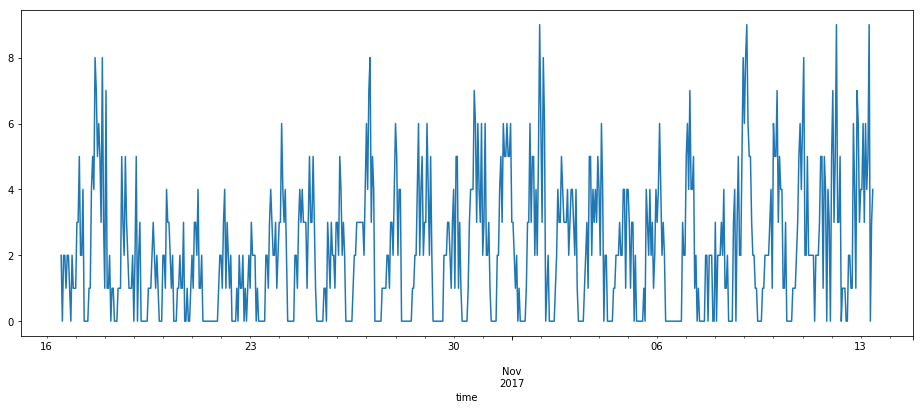

In [74]:
df_spot['spend'].resample('1H').count().plot(figsize=(16,6))

### Direct Traffic

Text(0.5,1,'Direct Traffic')

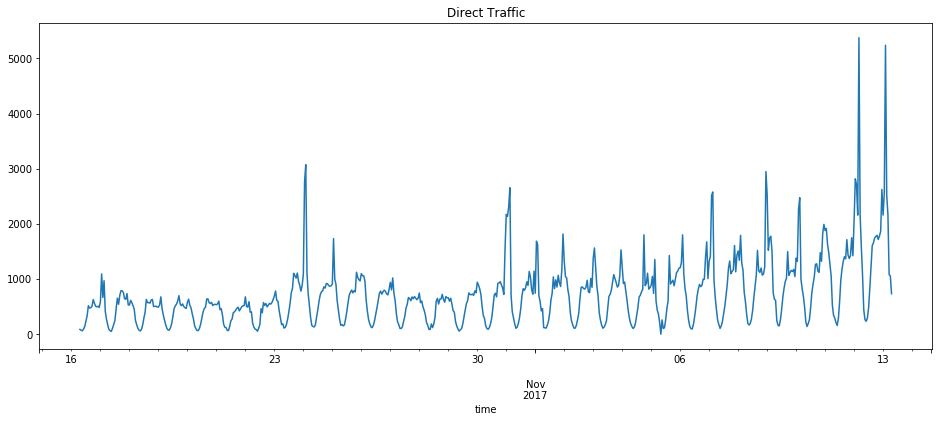

In [82]:
df_web[df_web['traffic_source'] == 'direct'].resample("1H")['value'].sum().plot(figsize=(16,6))
plt.title('Direct Traffic')

### Email Traffic

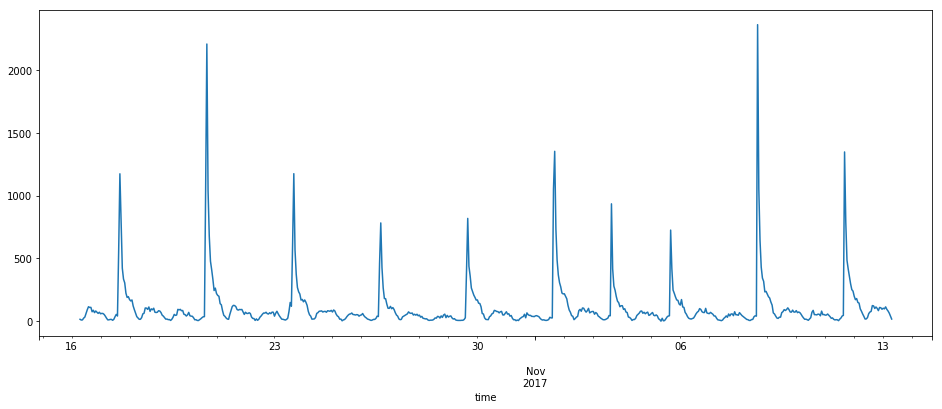

In [83]:
df_web[df_web['traffic_source'] == 'email'].resample("1H")['value'].sum().plot(figsize=(16,6))

In [78]:
df_web['traffic_source'].value_counts()

direct    40380
email     23571
Name: traffic_source, dtype: int64

Text(0,0.5,'Direct Traffic')

Text(0,0.5,'TV Spots')

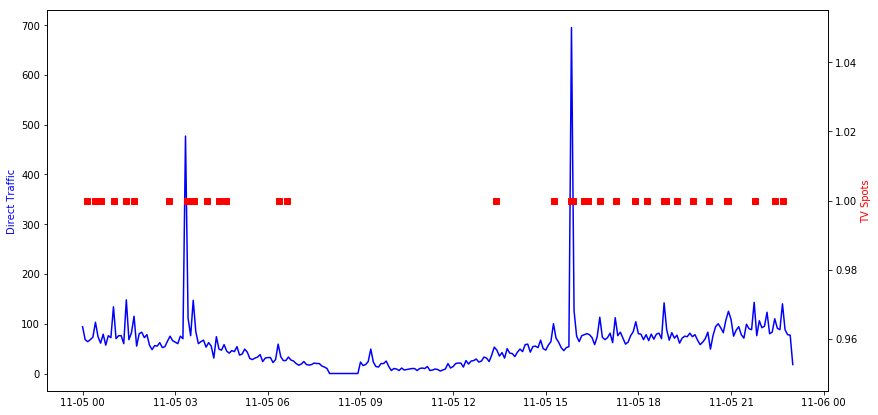

In [174]:
from_time = '2017-11-05'
to_time = '2017-11-05 23:00'

fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.plot(df_web[df_web['traffic_source'] == 'direct'][from_time:to_time].resample("5T")['value'].sum(), color='blue')
ax1.set_ylabel('Direct Traffic', color='blue')

ax2 = ax1.twinx()
spots_by_min = df_spot[from_time:to_time].resample('1min')['id'].count()
spots_by_min = spots_by_min[spots_by_min > 0]
ax2.plot(spots_by_min, color='red', marker='s', linestyle='none')
ax2.set_ylabel('TV Spots', color='red')

plt.show()

### Duration

In [36]:
df_spot['duration'].value_counts()

14.0    862
13.0    178
29.0     86
15.0     22
12.0      8
17.0      8
28.0      6
27.0      2
Name: duration, dtype: int64

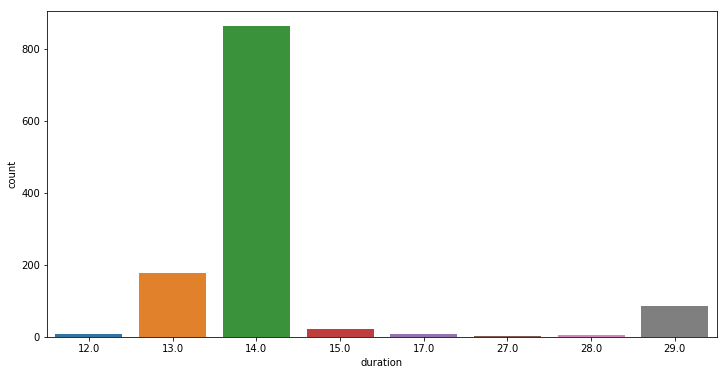

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(x='duration', data=df_spot)

### Spend

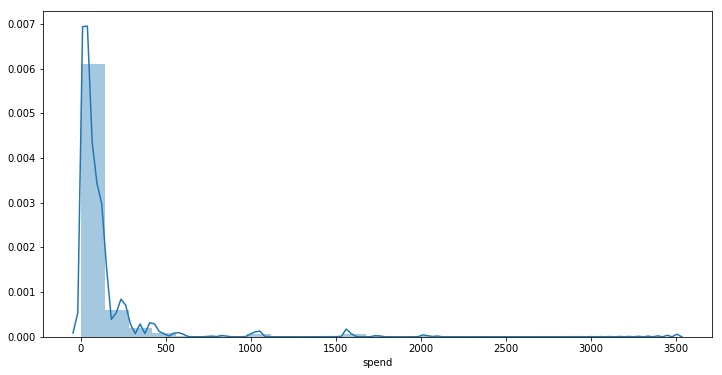

In [47]:
plt.figure(figsize=(12,6))
sns.distplot(df_spot['spend'], bins=25)

## Web Baseline

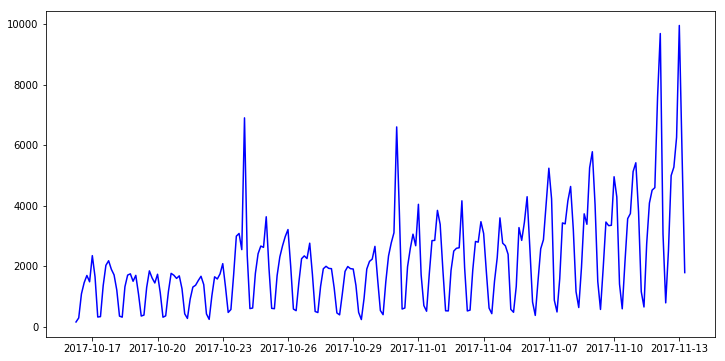

In [196]:
plt.figure(figsize=(12,6))
plt.plot(df_web[df_web['traffic_source'] == 'direct'].resample("3H")['value'].sum(), color='blue')

In [189]:
from statsmodels.graphics.tsaplots import plot_acf

/Users/rgabillet/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


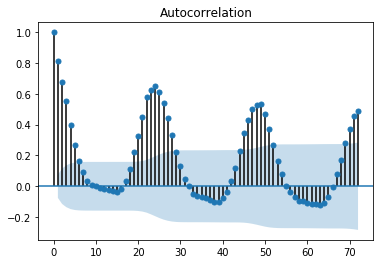

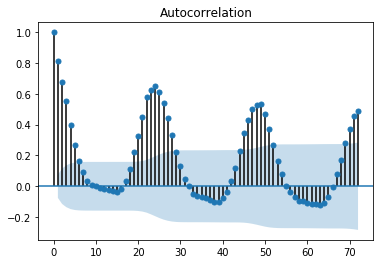

In [200]:
plot_acf(df_web[df_web['traffic_source'] == 'direct'].resample("1H")['value'].sum(), lags=3*24)